In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_track_features = pd.read_csv("tracks_full.csv")
df_track_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981527 entries, 0 to 981526
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        981527 non-null  int64  
 1   danceability      981527 non-null  float64
 2   energy            981527 non-null  float64
 3   key               981527 non-null  int64  
 4   loudness          981527 non-null  float64
 5   mode              981527 non-null  int64  
 6   speechiness       981527 non-null  float64
 7   acousticness      981527 non-null  float64
 8   instrumentalness  981527 non-null  float64
 9   liveness          981527 non-null  float64
 10  valence           981527 non-null  float64
 11  tempo             981527 non-null  float64
 12  id                981527 non-null  object 
 13  duration_ms       981527 non-null  int64  
 14  time_signature    981527 non-null  int64  
 15  name              981523 non-null  object 
 16  artists           98

[Text(0.5, 0, 'danceability'),
 Text(1.5, 0, 'energy'),
 Text(2.5, 0, 'loudness'),
 Text(3.5, 0, 'speechiness'),
 Text(4.5, 0, 'acousticness'),
 Text(5.5, 0, 'instrumentalness'),
 Text(6.5, 0, 'liveness'),
 Text(7.5, 0, 'valence'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'duration_ms'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'year')]

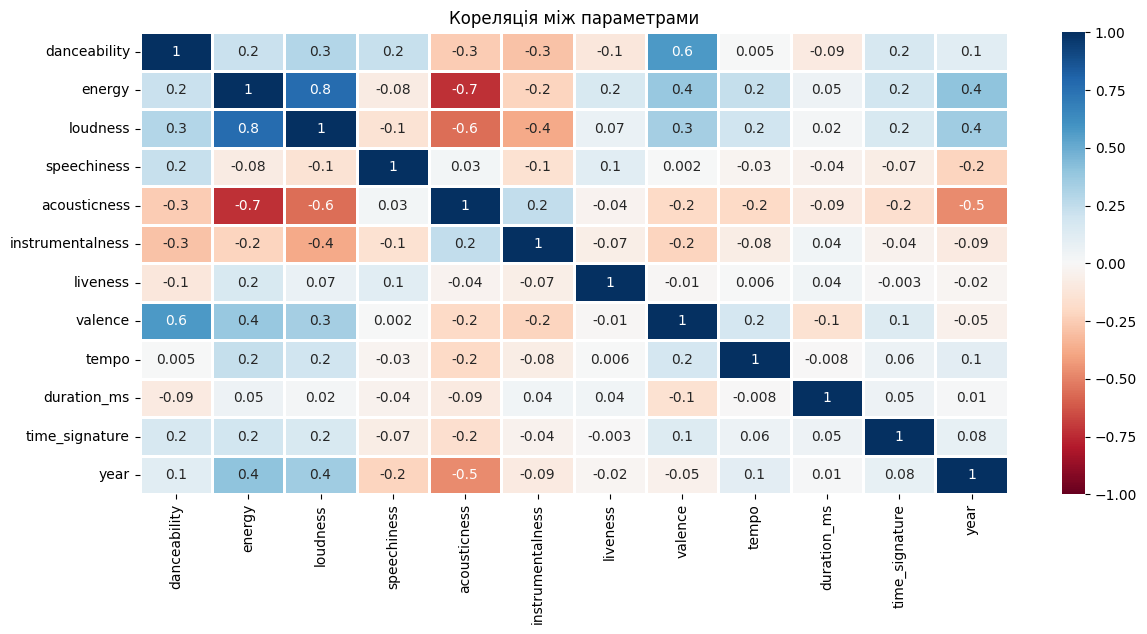

In [18]:
corr_df = df_track_features.drop(["Unnamed: 0","name", "type", "release_date", "key","mode","explicit", "id", "artists"], axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))

heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, linewidths=1, cmap='RdBu')
heatmap.set_title("Кореляція між параметрами")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [25]:
sample_df = df_track_features.sample(int(0.004*len(df_track_features)))

[Text(0.5, 1.0, 'Кореляція Гучності та  Енергічності')]

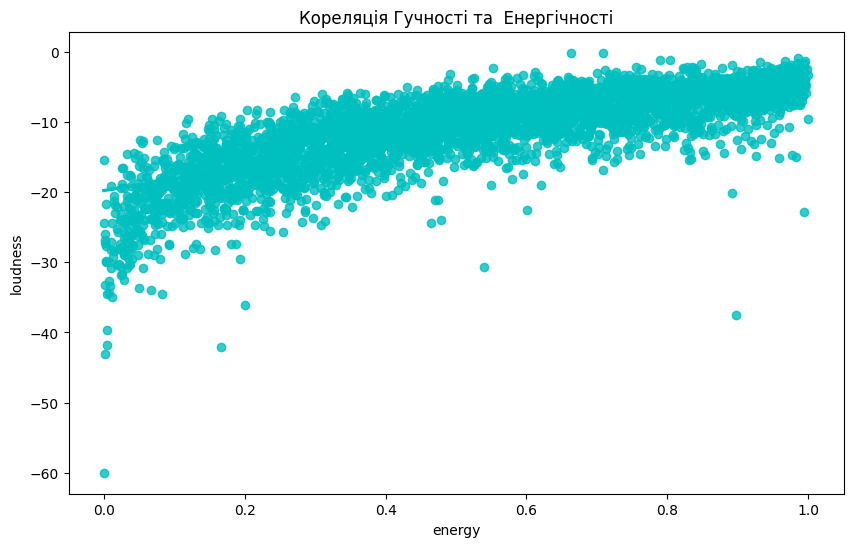

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y = "loudness", x = "energy", color = "c").set(title = "Кореляція Гучності та  Енергічності")

In [33]:
years = df_track_features.year

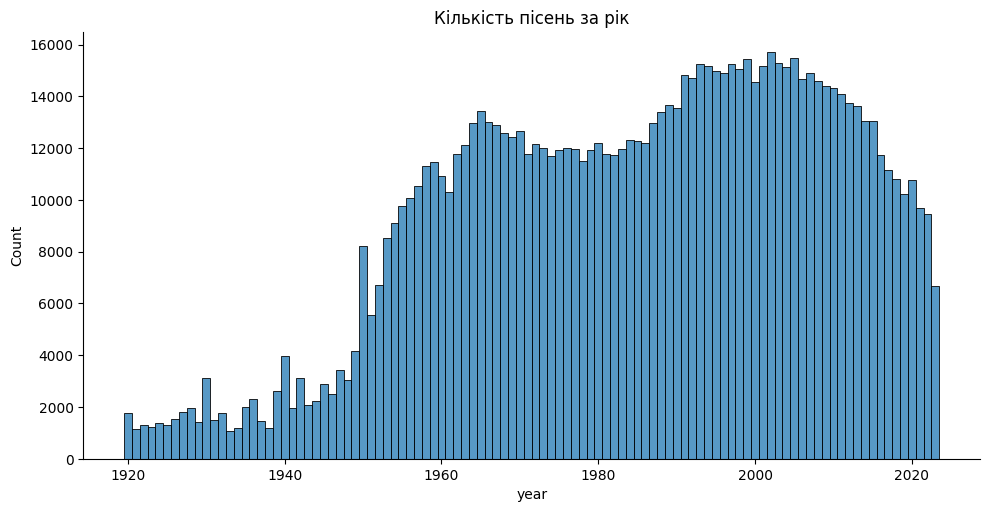

In [36]:
sns.displot(years, discrete=True,aspect=2,height=5,kind="hist").set(title="Кількість пісень за рік")

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103]),
 [Text(0, 0, '1920'),
  Text(1, 0, '1921'),
  Text(2, 0, '1922'),
  Text(3, 0, '1923'),
  Text(4, 0, '1924'),
  Text(5, 0, '1925'),
  Text(6, 0, '1926'),
  Text(7, 0, '1927'),
  Text(8, 0, '1928'),
  Text(9, 0, '1929'),
  Text(10, 0, '1930'),
  Text(11, 0, '1931'),
  Text(12, 0, '1932'),
  Text(13, 0, '1933'),
  Text(14, 0, '1934'),
  Text(15, 0, '1935'),
  Text(16, 0, '1936'),
  Text(17, 0, '1937'),
  Text(18,

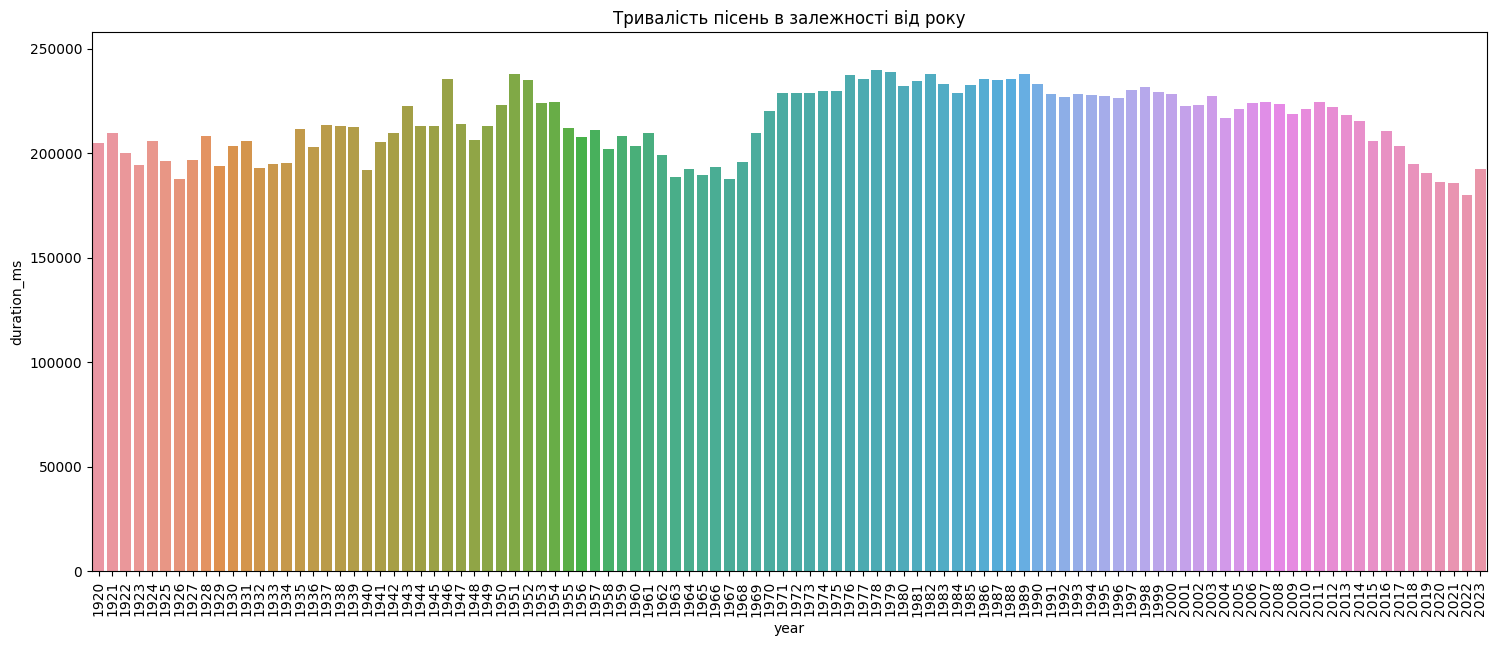

In [35]:
total_duration = df_track_features.duration_ms
fig, ax = plt.subplots(figsize = (18,7))
fig = sns.barplot(x = years, y = total_duration, ax=ax, errwidth = False).set(title="Тривалість пісень в залежності від року")
plt.xticks(rotation=90)